# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ 
# (ADVANCED FUNCTIONAL EDA)

## Genel Resim

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")
df.head()

# verinin genel durumu anlamak adına ve veriye hızlı bir bakış atabilmek adına .head() metodunu kullanırız.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# yine tablonun boyutunu görmek adına;

df.shape

(891, 15)

In [4]:
# genel bir bilgi alma amaçlı;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# indeks durumu hakkında bilgi alma amacı için;

df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
# sayısal değişkenlerin betimsel istatistiki özet bilgilerini görebilmek adına;
# .T daha kolay okunmasını sağlar.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# Tabloda null değer var mı diye bakmak için;

df.isnull().values.any()

True

In [8]:
# Hangi sütunda kaç null değer var görebilmek için;

df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# bir veri setindeki verilere ait bilgileri rahatça görebilmek adına bir fonksiyon tanımlayacağız;

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [10]:
check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  

## Katogorik Değişken Analizi

In [11]:
df["embarked"].value_counts()

# kategorik değişkenlerin frekansını, sıkılığını verir.

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
df["sex"].unique()

# Kategorik değişkenin unique değişkenlerini gösterir

array(['male', 'female'], dtype=object)

In [13]:
df["sex"].nunique()

# kategorik değişkenin kaç adet unique değeri var onu gösterir. "number of unique"


2

In [14]:
# 3 adet kategorik değişken vardır;
    # Boolean
    # Category
    # Object

# Değişken tipi "category" ve "object" olan veriler arasında şöyle bir fark vardır ki;
# category de kendi içinde sıralama vardır, lakin object'de yoktur.

# Kategorik değişkenlerde dikkat edilmesi gereken bir başka şey ise;
# görünüş olarak kategorik olmayan (int64, float64 vs. gibi) ama aslında kategorik olan değişkenlerdir.
# Örneğin "titanic" veri setinde "survived" değişkeni int64 veri tipinde gibi gözükse de  aslında kategorik bir değişkendir.
# Zira yaşayıp, yaşamadığını gösterir.

# Aşağıda kategorik değişkenleri bir seçelim;

cat_col=[col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_col 

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [15]:
# Aşağıda değişken tipi integer veya float olup ama aslında kategorik olan veri türlerini seçeceğiz;

# Bunun için de o değişken türünün eşsiz değer sayısının belirli bir sayıdan küçük olması ile takip edeceğiz.

num_but_cat=[col for col in df.columns if (str(df[col].dtypes) in ["float64", "int64"]) & (df[col].nunique()<10)]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [16]:
# Bir kategorik değişken ölçüm değeri taşımıyor olabilir, örneğin ad-soyad gibi;
# Bu değişkenlere kardinalitesi (cardinality) yüksek değişken denir.
# Bu ölçülemeyecek, açıklanamayacak kadar fazla sınıfı olduğu manasına gelir.
# Örneğin bir değişkenin 50 sınıf olması onun kardinalitesi (cardinality) yüksek olduğu manasına gelebilir.

cat_but_car=[col for col in df.columns if (str(df[col].dtypes) in ["category", "object", "bool"]) & (df[col].nunique()>20)]
cat_but_car

# Baktığımız zaman böyle bir değişken yokmuş.
# Eğer ki böyle bir veri olsaydı, yani cat_but_car listesi boş dönmemiş olsaydı, o zaman bunu cat_col listesinden çıkartacaktık.

[]

In [17]:
cat_col = cat_col + num_but_cat
cat_col = [col for col in cat_col if col not in cat_but_car]

df[cat_col].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [18]:
# Numerik değişkenler ise;

[col for col in df.columns if col not in cat_col]

['age', 'fare']

In [19]:
# Öyle bir fonksiyon yazalım ki;

# df içerisindeki ilgili kolunun value_counts()'nın alsın,
print(df["survived"].value_counts())

# ilgili column'ın altındaki sınıflara ilişkin yüzdelik değer versin,
print(df["survived"].value_counts()/len(df)*100)

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),
        "Ratio" : dataframe[col_name].value_counts()/len(dataframe)*100
        }))
    print("##########################################")

0    549
1    342
Name: survived, dtype: int64
0    61.616162
1    38.383838
Name: survived, dtype: float64


In [20]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


In [21]:
for col in cat_col:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#####################

In [22]:
# cat_summary fonksiyonumuza bir özellik daha eklemek istersek ve bu özellik de ilgili sütunun grafiğini çizmemizi isterse;
# Kategorik değişkenleri grafikte en kolay sütun grafiği ile gösterebiliriz

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),
        "Ratio" : dataframe[col_name].value_counts()/len(dataframe)*100
        }))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


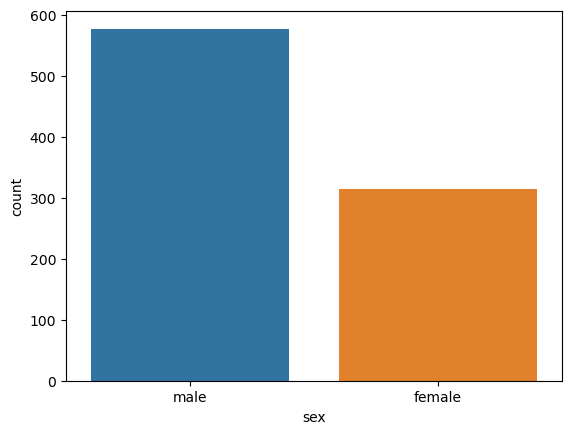

In [23]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


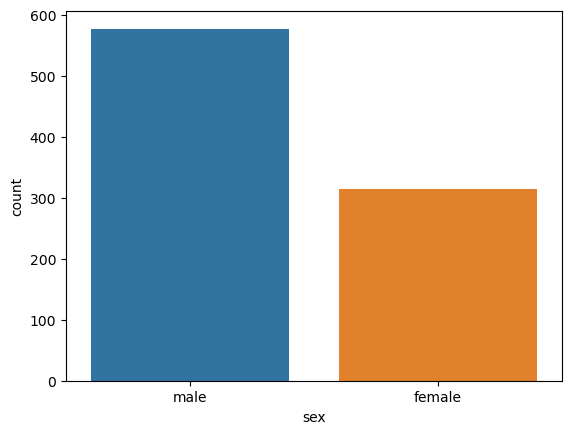

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


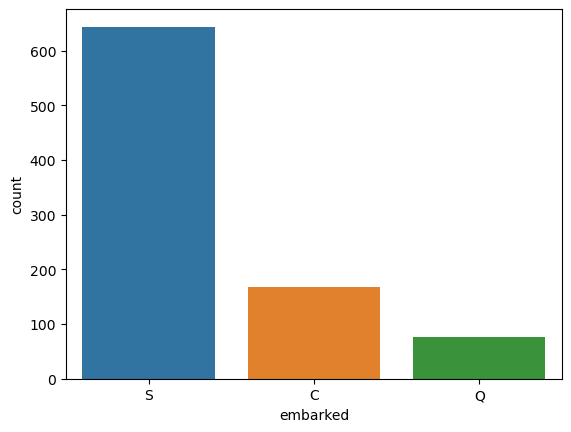

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


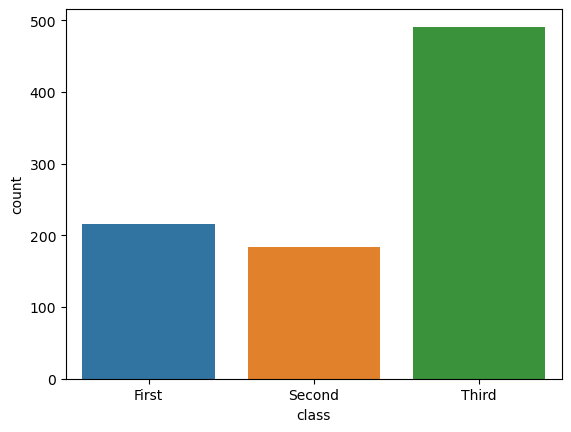

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


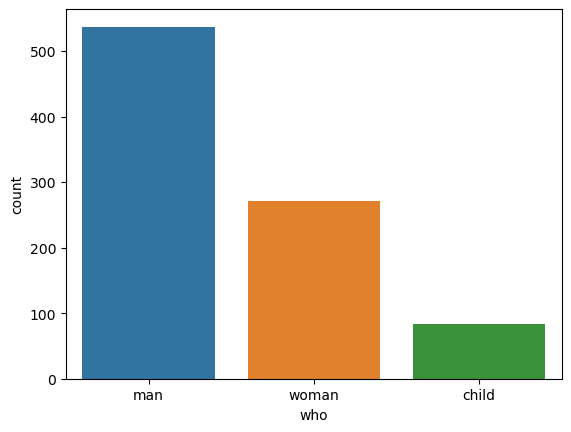

       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
for col in cat_col:
    cat_summary(df, col, plot=True)

In [25]:
# Yukarıdaki kod çalıştırıldığında, kod bir aşamaya kadar geldi daha sonrasında ise hata verdi.
# Hata vermesinin sebebi ise ilgili sütunda boolean bir veri tipine rrastladı ve bunu görselleştiremedi.
# Bu veri tipine de bir bakalım;

df["adult_male"].head()

0     True
1    False
2    False
3    False
4     True
Name: adult_male, dtype: bool

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


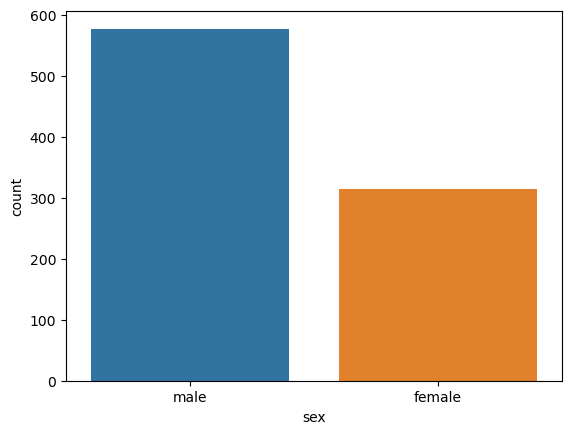

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


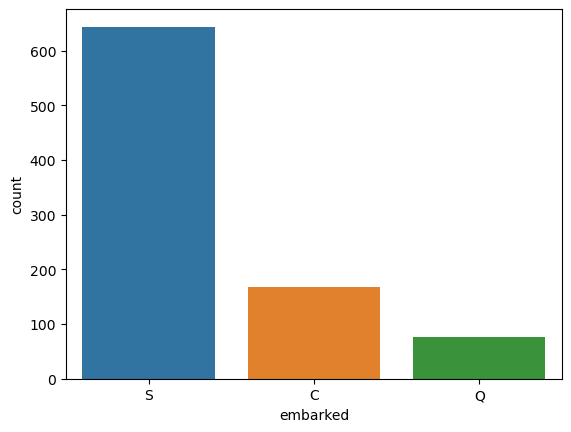

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


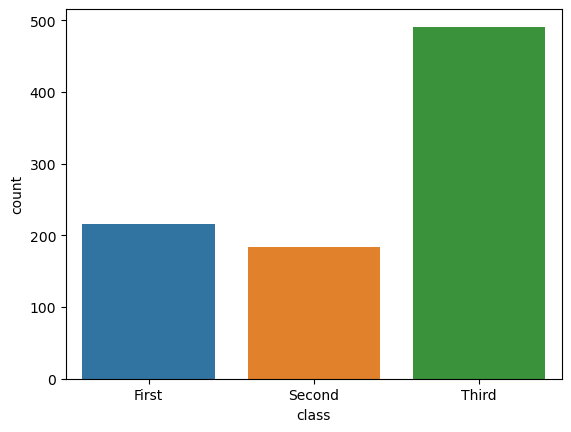

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


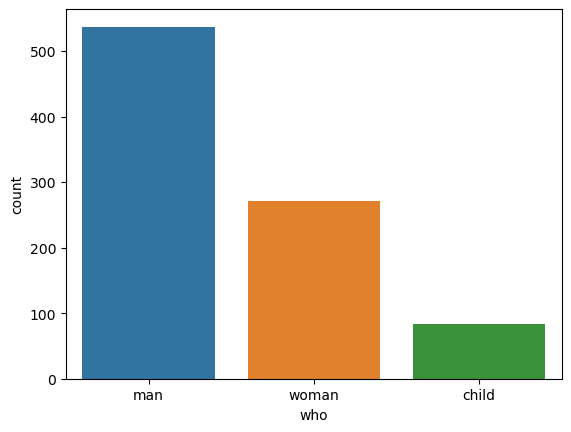

#############################
adult_male
THIS DATA/COLUMN IS BOLLEAN
#############################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


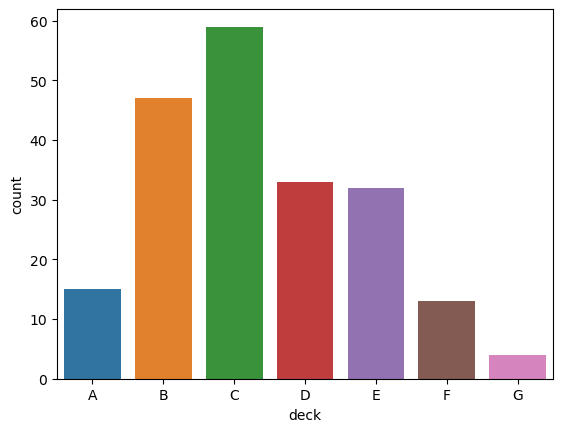

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


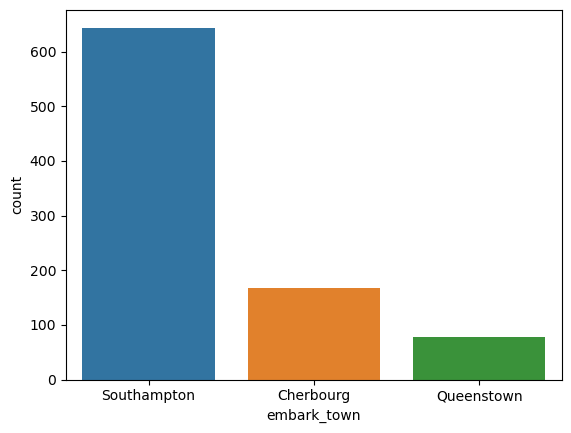

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


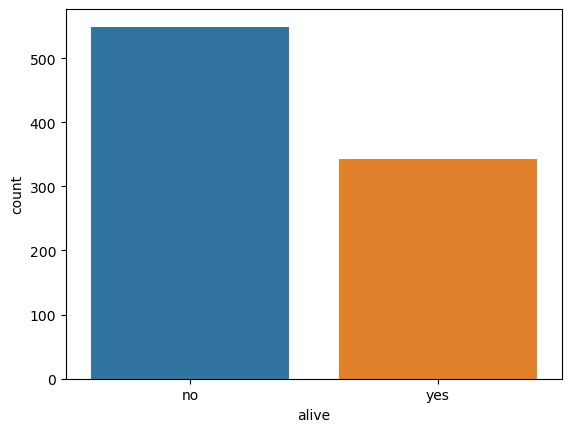

#############################
alone
THIS DATA/COLUMN IS BOLLEAN
#############################
   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


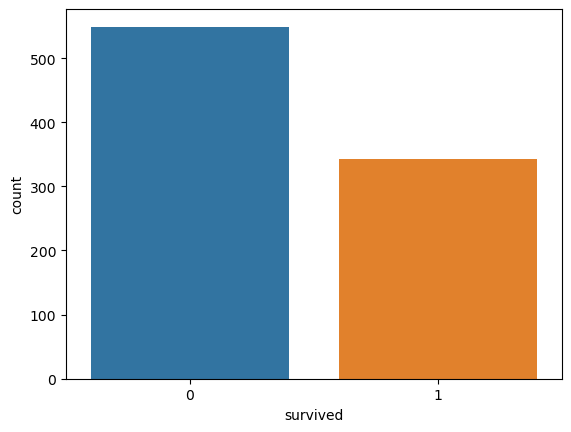

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


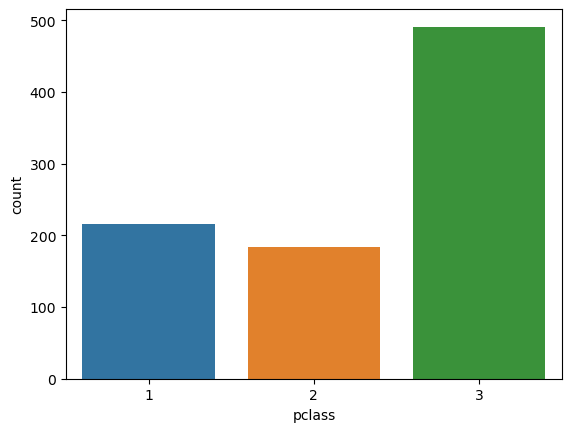

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


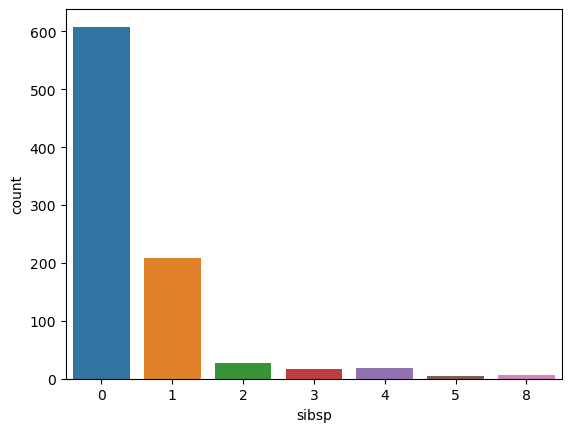

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


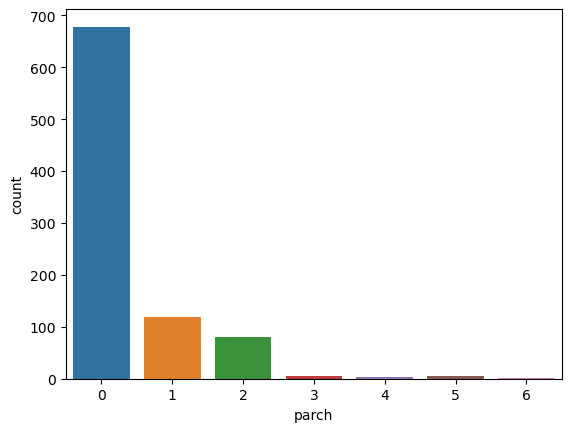

In [26]:
# Şimdi bu hatanın üstesinden basit bir şekilde gelelim,

for col in cat_col:
    if df[col].dtype == "bool":
        print("#############################")
        print(col)
        print("THIS DATA/COLUMN IS BOLLEAN")
        print("#############################")
    else:
        cat_summary(df, col, plot=True)

In [27]:
# Yukarıda hatayı skip ederek üstesinden geldik, lakin bu hataya kalıcı bir çözüm oluşturmak istersek şu metodu bimeliyiz;

df["adult_male"].astype(int).head()

# .astype() metodu ile data'nın türünü çevirmiş olduk ve "True" olanlar 1, "False" olanlar ise 0 oldu.
# şimdi bunu kod bloğumuza ekleyelim.

0    1
1    0
2    0
3    0
4    1
Name: adult_male, dtype: int64

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


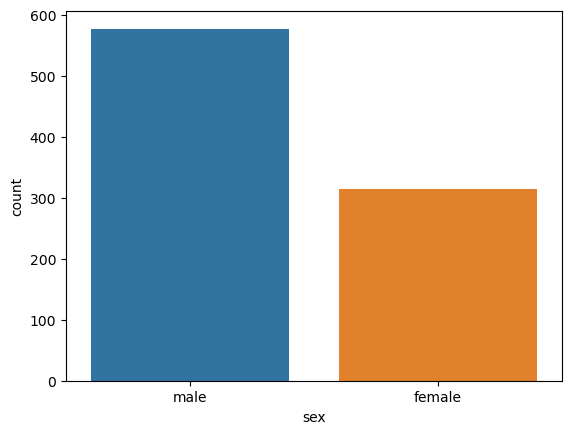

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


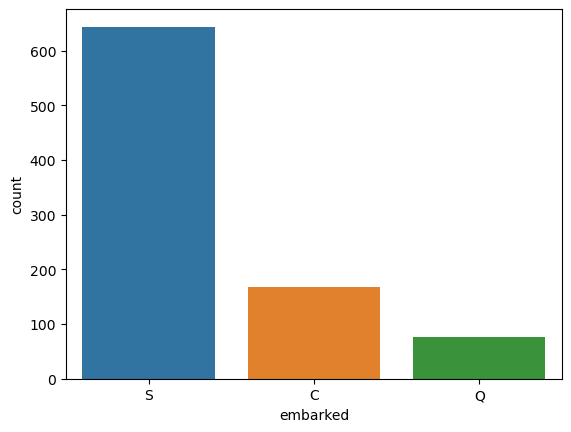

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


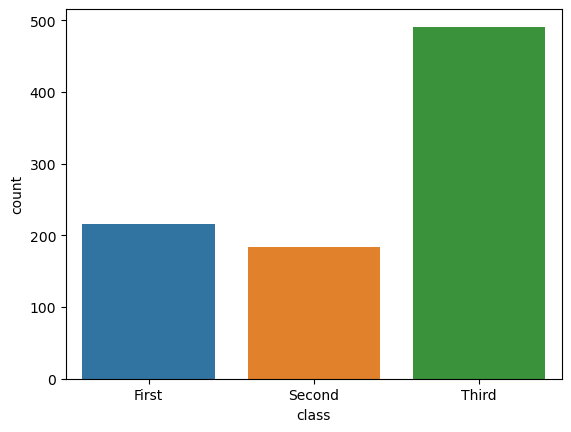

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


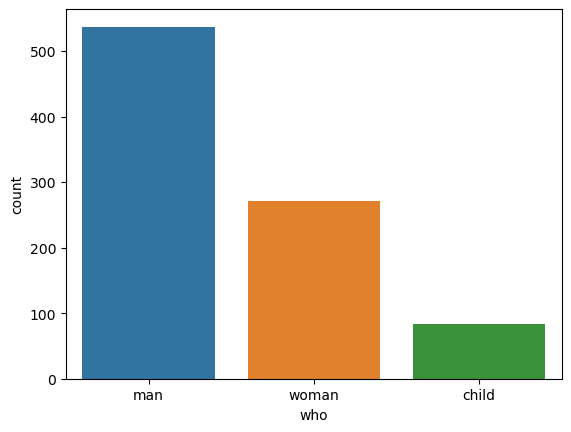

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


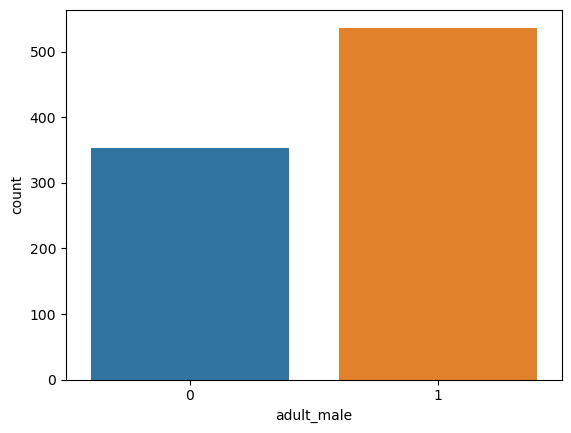

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


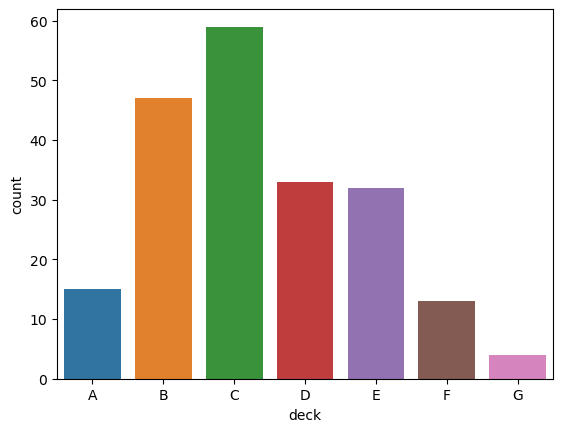

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


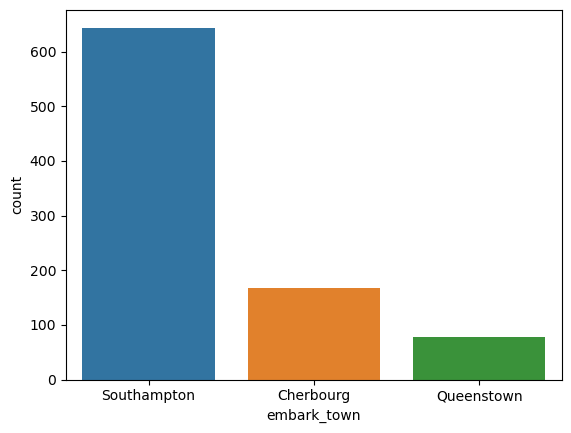

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


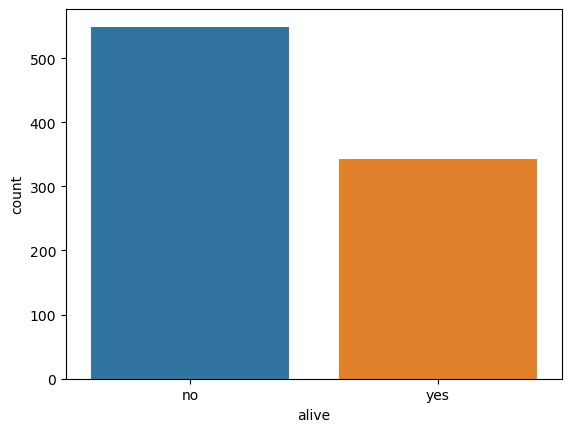

   alone     Ratio
1    537  60.26936
0    354  39.73064
##########################################


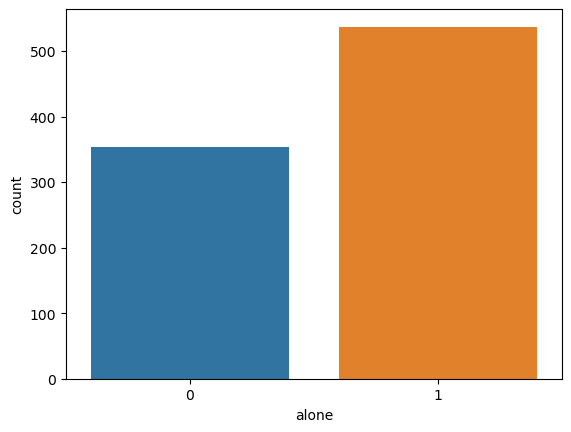

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


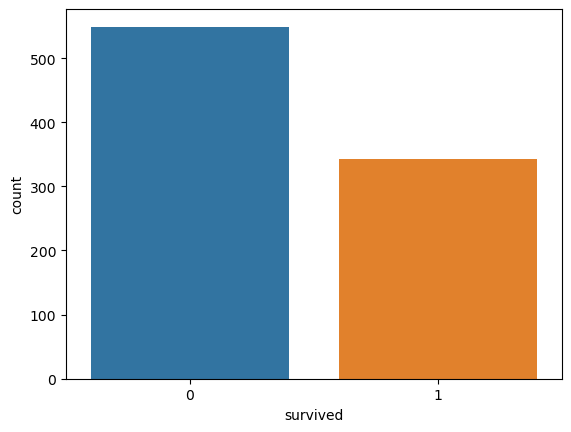

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


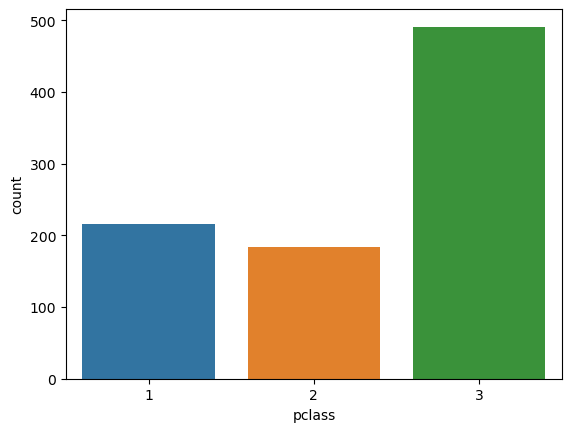

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


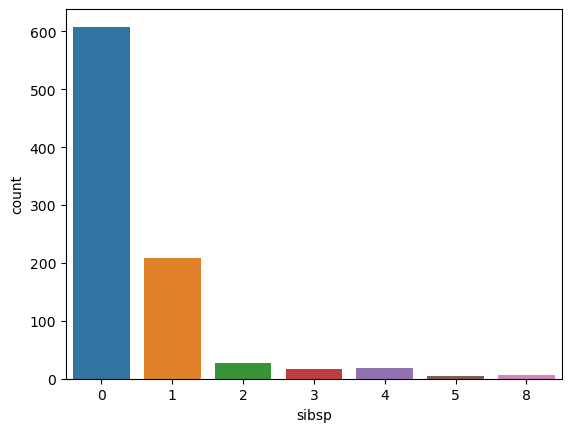

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


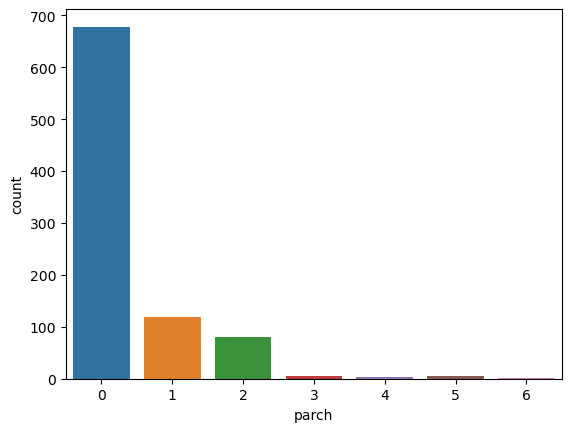

In [28]:
for col in cat_col:
    if df[col].dtype == "bool":
        df[col]=df[col].astype(int)
        cat_summary(df, col, plot=True)
    else:
        cat_summary(df, col, plot=True)

## Sayısal Değişken Analizi

In [29]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
# Aşağıda değişkenlerimizi bulalım;


cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
# Bir yukarıdaki comprehension'da kategorik değişkenlerimizi seçiyoruz.

num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
# Bir yukarıdaki comprehension'da ise numerik gibi gözüken kategorik değişkenlerimizi seçiyoruz.

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
# Bir yukarıdaki comprension'da ise kategorik olan ama kardinalitesi yüksek olan değişkenlerimizi seçiyoruz.

cat_cols = cat_cols + num_but_cat
# Yukarıda kategorik değişkenlerimizle numerik gibi gözüken ama kategorik olan değişkenlerimizi topluyoruz.

cat_cols = [col for col in cat_cols if col not in cat_but_car]
# Bir yukarıda ise kardinalitesi yüksek olan değişkenlerimizi ayırıyoruz.


In [31]:
# En son halinde kategorik değişkenlerimize bir göz atalım.

cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [32]:
# Bu kısımda ise numerik değişkenlerimizi seçeceğiz;

num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
# Bir yukarıdaki comprehension'da numerik olan değişkenleri seçiyoruz.

num_cols = [col for col in num_cols if col not in cat_cols]
# Bir yukarıdaki comprehension'da ise kategorik değişkenlerin içerisinde bulunan numerik değişkenleri ayıklıyoruz.

In [33]:
# Numerik değişkenlerimizin son haline bir göz atalım;

num_cols

['age', 'fare']

In [34]:
# Şimdi öyle bir fonksiyon tanımlayalım ki;
# Bu fonksiyon bize ilgili numerik değişken için istatistiki özet bir tablo versin.

def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print("##############################")

In [35]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
##############################


In [36]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
##############################
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64
##############################


In [37]:
# Biz bir de foksiyonumuzun grafik çizmesini istersek;
# numerik değişkene sahip olan bir verinin grafiği histogram olabilir!!!

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


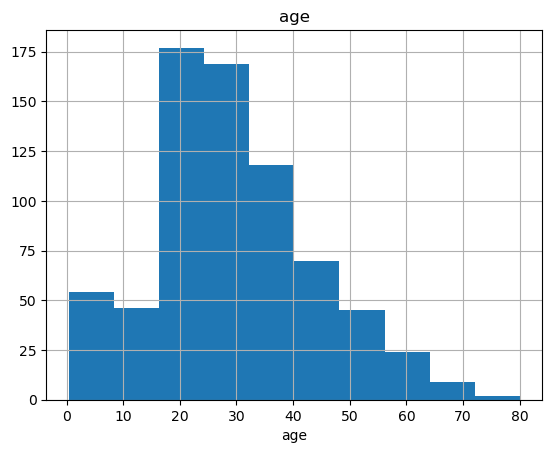

In [38]:
num_summary(df, "age", plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


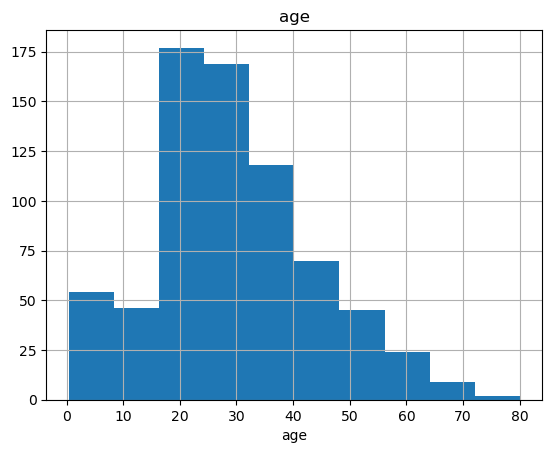

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


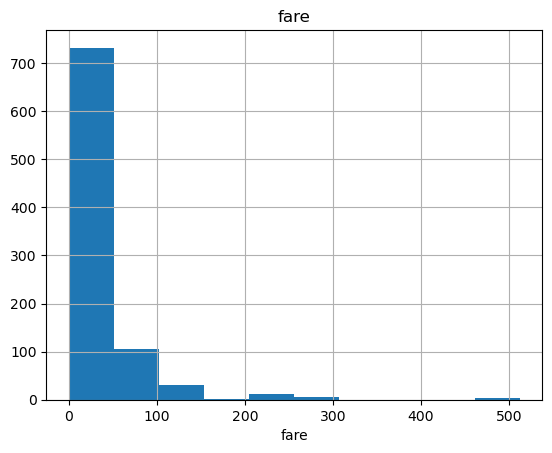

In [39]:
for col in num_cols:
    num_summary(df, col, plot=True)

## Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi

In [40]:
# Öyle bir fonksiyon yazacağız ki, dataframe içerisindeki değişkenleri otomatik olarak yakalayacak;

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # "cat_th" numerik gibi gözüken kategorik değişkenlerin kategori sayısının sınırıdır. 
    # Yani 10'dan az eşsiz değer var ise biz buna kategorik değişken diyeceğiz.
    # "car_th" ise cardinal değişkenlik sınırıdır.
    # Yani bir kategorik değişkenin  20'dan fazla eşsiz değer var ise biz buna kardinalitesi yüksek değişken diyip analizimizden çıkaracağız.
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [41]:
grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [42]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 4


## Hedef Değişken Analizi

In [43]:
# Örnek olarak titanic dataset'inde "survived" bizim hedef değişkenimizdir. Diğer değişkenlerle hedef değişkeni analiz etmek isteriz.

### Hedef Değişkenin Kategorik Değişkenler ile Analizi

In [44]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [45]:
# Yukarıdaki durumu bir fonksiyon ile yapmak istediğimizde ise;

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [46]:
target_summary_with_cat(df, "survived", "sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908




In [47]:
target_summary_with_cat(df, "survived", "pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363




In [48]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


            TARGET_MEAN
adult_male             
False          0.717514
True           0.163873


      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       TARGET_MEAN
alive             
no             0.0
yes            1.0


       TARGET_MEAN
alone             
False     0.505650
True      0.303538


          TARGET_MEAN
survived             
0                 

### Hedef Değişkenin Sayısal Değişkenler iler Analizi

In [49]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [50]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [51]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


In [52]:
target_summary_with_num(df, "survived","age")

                age
survived           
0         30.626179
1         28.343690




In [53]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)


                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




## Korelasyon Analizi

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
yol = "datasets/breast_cancer.csv"

df = pd.read_csv(yol)
df = df.iloc[:, 1:-1]       # df'i yeniden tanımlamamızın sebebi ilk ve son sütunu istememizden kaynaklıdır.
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
# Amacımız bir veri setindeki değişkenler üzerinden ısı haritası oluşturarak, 
# yüksek kolerasyonlu değişkelerden birini veri setinden çıkarmaktır.

num_cols = [col for col in df.columns if df[col].dtype in [int, float]]
num_cols


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [57]:
# Korelasyon tablosu çıkarmak için;

corr = df[num_cols].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


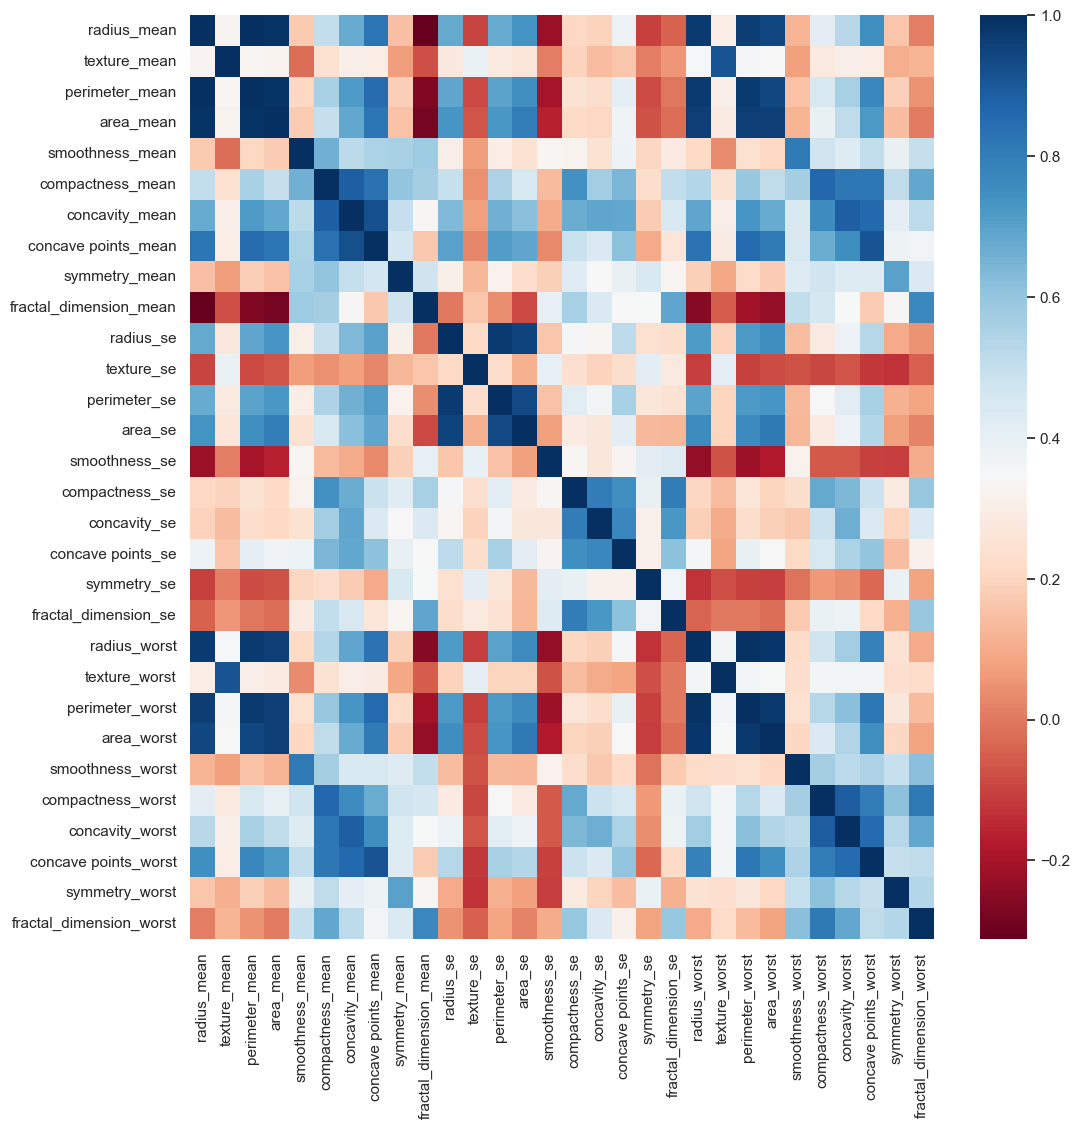

In [58]:
# Isı haritasını çıkarmak için;

sns.set(rc={"figure.figsize": (12,12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

### Yüksek Korelasyonlu Değişkenlerin Silinmesi

In [59]:
# Korelasyonun negatif veya pozitif olması ile ilgilenmeyip bütün tablonun mutlak değerini almak istiyoruz;
# Bir tablonun mutlak değerini almak istersek ".abs()" metodunu kullanırız.

cor_matrix= df.corr().abs()
cor_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [60]:
#           0         1         2         3
# 0  1.000000  0.117570  0.871754  0.817941
# 1  0.117570  1.000000  0.428440  0.366126
# 2  0.871754  0.428440  1.000000  0.962865
# 3  0.817941  0.366126  0.962865  1.000000


#     0        1         2         3
# 0 NaN  0.11757  0.871754  0.817941
# 1 NaN      NaN  0.428440  0.366126
# 2 NaN      NaN       NaN  0.962865
# 3 NaN      NaN       NaN       NaN


# Yukarıdaki tablolara bakıldığında 4x4'lük bir matriks bulunuyor. Bu matriks 4 değişkenin bir biri ile olan korelasyonunu ifade ediyor.
# İlk tabloya bakıldığında köşegenlerde verinin kendisi ile olan ilişkisi 1 olarak gözükmektedir.
# Ayırca matriks köşegen olarak simetriktir.
# Dolayısıyla bizim bunu ikinci tablodaki gibi hale getirip 1. tablodaki gereksiz bilgilerden kurtarmamız gerekmektedir.

In [61]:
# Yukarıdaki durumu gerçekleştirebilmek adına aşağıdaki kodu çalıştıracağız

upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

In [62]:
# np.ones() içine gönderdiğimiz şekilde bize 1'lerden oluşan matris oluşturur.
# np.ones() içerisine başka bir matrisin .shape'ini gönderirsek o matirisin ölçülerinde birlerden oluşan bir matris oluşturur.

x=np.ones([3,3])
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [63]:
# np.triu ise matrisi belirli bir ölçüde keser ve kestiği yerden itibaren 0 haline getirir. İçine k parametresi alır.
# k parametresinin ön tanımlı değeri 0'dır.

x=np.ones([5,5])
x

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [64]:
# triu devamı;

x1=np.triu(x)
x1

# Aşağıda görüldüğü üzere tam olarak köşegenin altından kesti. 

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

In [65]:
x2=np.triu(x, k=1)
x2

# Köşegenden kesti.

array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [66]:
x2=np.triu(x, k=-1)
x2

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [67]:
# Biz bir matrisi bool hale de getirebiliriz.
x2.astype(bool)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True]])

In [68]:
# ".where()" metodu ise şöyle açıklanabilir;

a = np.array([[1, 2, 3], [4, 5, 6]])
  
print(a)

[[1 2 3]
 [4 5 6]]


In [69]:
print ('Indices of elements <4')
b = np.where(a<4)
print(b)

Indices of elements <4
(array([0, 0, 0]), array([0, 1, 2]))


In [70]:
print("Elements which are <4")
print(a[b])

Elements which are <4
[1 2 3]


In [71]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [72]:
# Yukarıdaki tabloya bakıldığında, bazı değişkenler arasındaki korelasyonların %90'dan büyüktür.
# Şimdi ise değer %90'dan büyük ise o değerin silinmesi geretiğini söyleyeceğiz.
# Şimdi sileneceklere dair bir liste oluşturuyoruz.

drop_list=[col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
drop_list

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [73]:
df.drop(drop_list, axis=1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [74]:
df.shape

# df'in 31 adet sütunu olduğunun aşağıdan görüyoruz. Bir yukarıda ise bunun 21 sütuna indiğini görüyoruz.

(569, 31)

In [75]:
# Şimdi ise bunu fonksiyon haline getirelim;

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [76]:
high_correlated_cols(df)

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

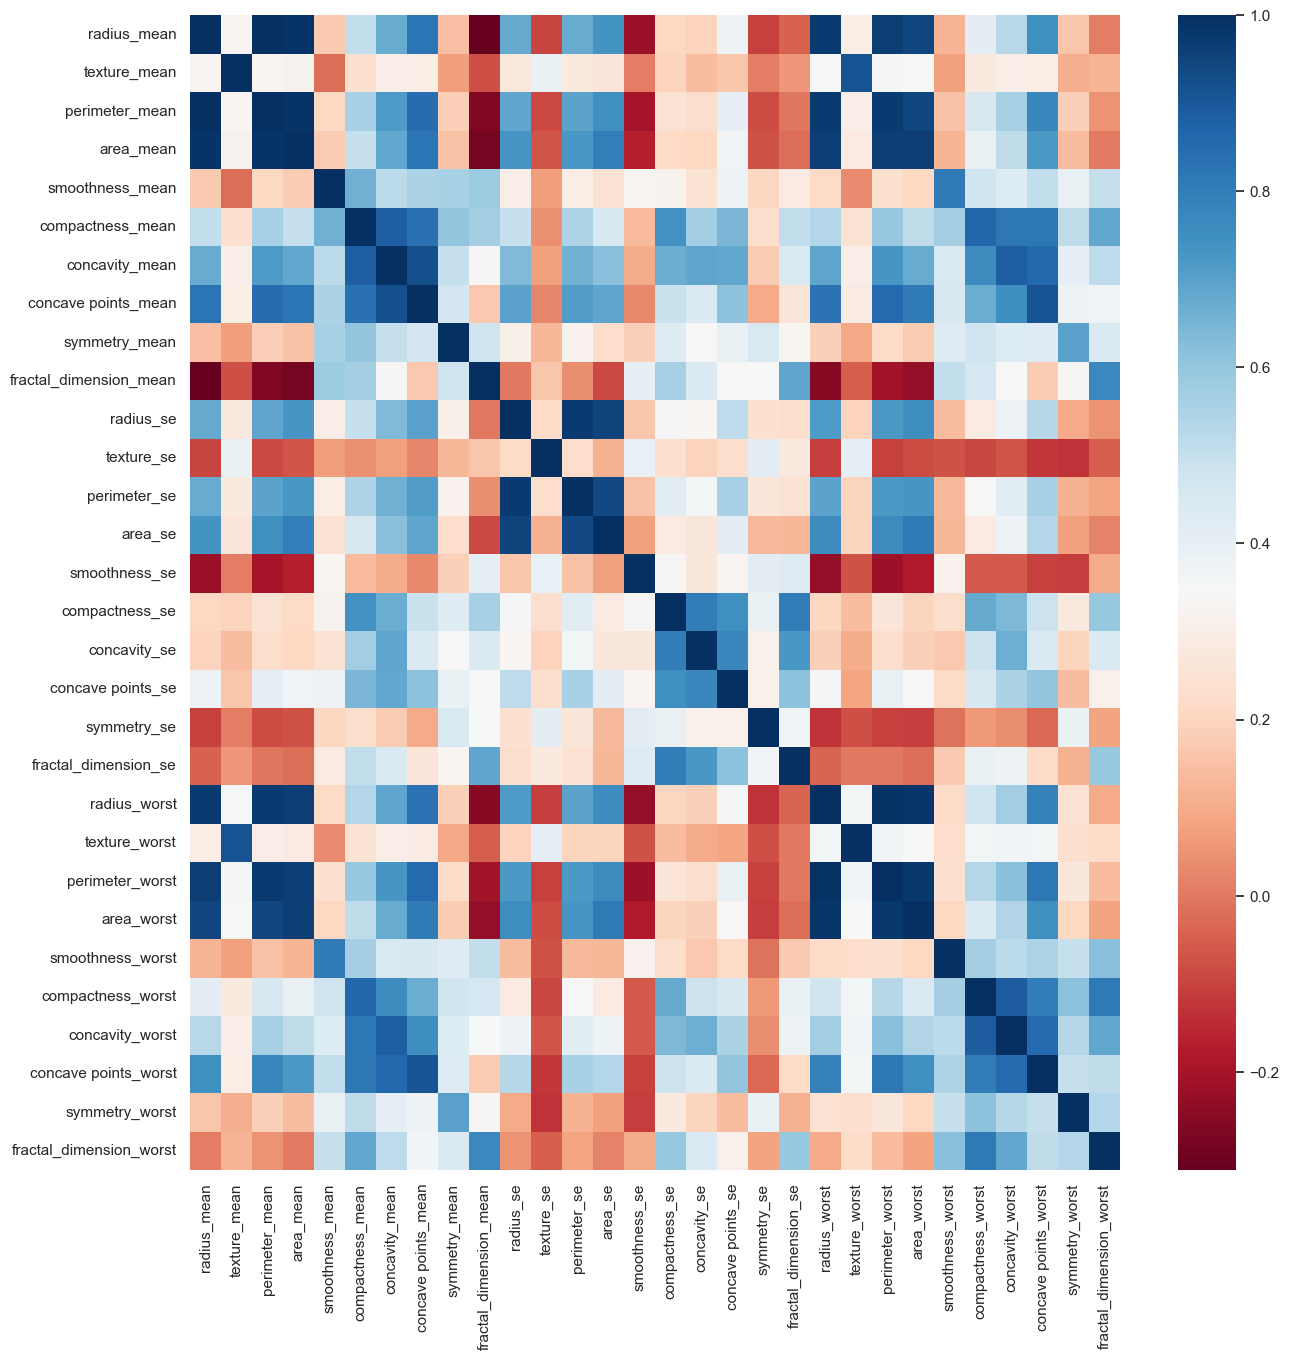

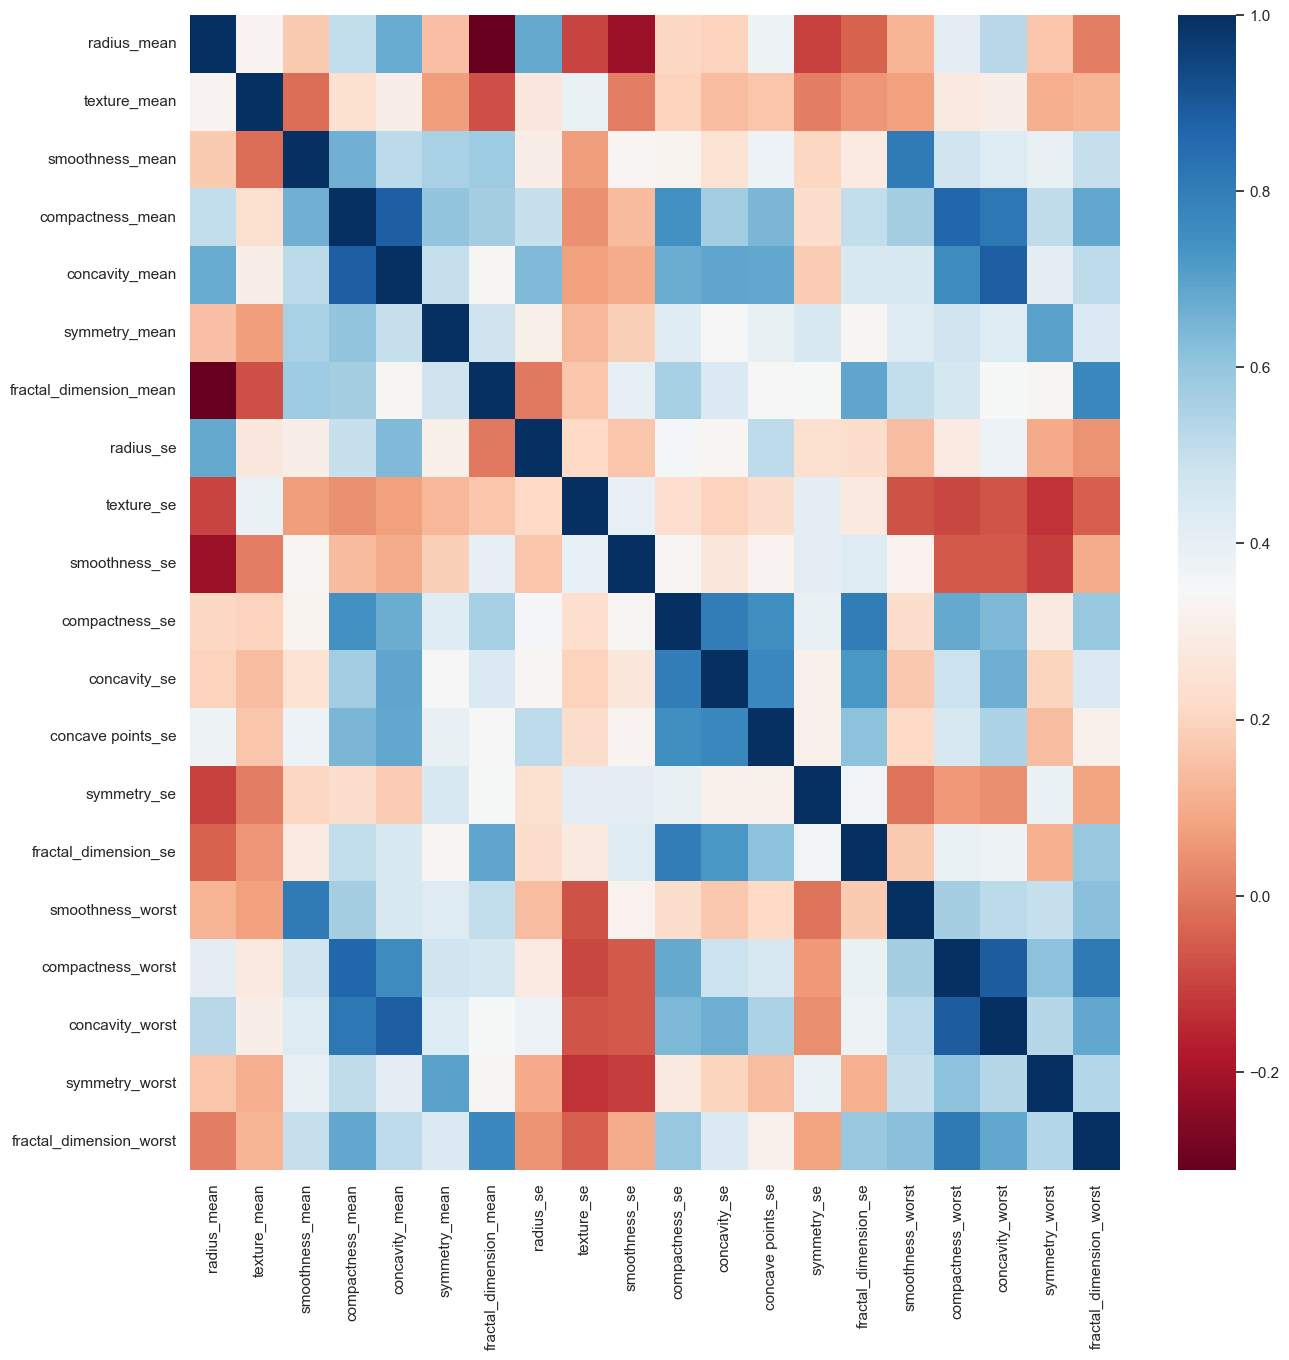

[]

In [77]:
high_correlated_cols(df, plot=True)
high_correlated_cols(df.drop(drop_list, axis=1), plot=True)

In [78]:
# Yukarıda ikinci grafiğe baktığımızda koyu renklerin gittiğini görebiliyoruz.